## Final Project Submission

Please fill out: 
* Student name: kolol christine
* Student pace:  full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [41]:
# Your code here - remember to use markdown cells for comments as well!

Microsoft is looking into venturing into film production and have decided to come up with a Movie Studio.The major setback is they do not have prior knowledge in the industry. this project aims into shedding light to the stakeholder by identifying films that are successful in the market. The objective is to help Microsoft decide on the films they will major into. Objectives: To identify top watched movies based on their popularity

In [42]:
import pandas as pd
import sqlite3
import seaborn as sn
import matplotlib.pyplot as plt

Doing explanatory data  anaylsis and cleaning the movie database, trying to get insights on the most popular movies, they relationship with genre, popularity and vote_count

In [43]:
movies_df= pd.read_csv("zippedData/tmdb.movies.csv.gz")

In [87]:
import chardet
rawdata = open('zippedData/rt.reviews.tsv.gz', 'rb').read()
result = chardet.detect(rawdata)
result

{'encoding': None, 'confidence': 0.0, 'language': None}

In [88]:
movie_info_df =pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter='\t')

In [89]:
movie_info_df.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [91]:
movie_info_df.shape

(1560, 12)

In [90]:
movie_info_df['rating'].unique()

array(['R', 'NR', 'PG', 'PG-13', nan, 'G', 'NC17'], dtype=object)

In [44]:
movies_df.set_index("id", inplace=True)

In [45]:
movies_df.head(10)

,Unnamed: 0,genre_ids,original_language,original_title,popularity,release_date,title,vote_average,vote_count
id,,,,,,,,,
12444,0,"[12, 14, 10751]",en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
10191,1,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
10138,2,"[12, 28, 878]",en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
862,3,"[16, 35, 10751]",en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
27205,4,"[28, 878, 12]",en,Inception,27.920,2010-07-16,Inception,8.3,22186
32657,5,"[12, 14, 10751]",en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
19995,6,"[28, 12, 14, 878]",en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
10193,7,"[16, 10751, 35]",en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
20352,8,"[16, 10751, 35]",en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057


Cleaning the dataframe by removing the "Unnamed: 0" column because its redundant

In [46]:
movies_df.drop("Unnamed: 0", axis=1, inplace= True)

In [47]:
movies_df.columns  # we can see that the redundant column is removed.

Index(['genre_ids', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

The data type consists of numerical, categorical data types.

In [48]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 12444 to 309885
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   original_language  26517 non-null  object 
 2   original_title     26517 non-null  object 
 3   popularity         26517 non-null  float64
 4   release_date       26517 non-null  object 
 5   title              26517 non-null  object 
 6   vote_average       26517 non-null  float64
 7   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 1.8+ MB


In [49]:
movies_df.duplicated()

id
12444     False
10191     False
10138     False
862       False
27205     False
          ...  
488143    False
485975    False
381231    False
366854    False
309885    False
Length: 26517, dtype: bool

We are gonna check the variety of language used in the acting

In [50]:
language_counts = movies_df['original_language'].value_counts()[:10]

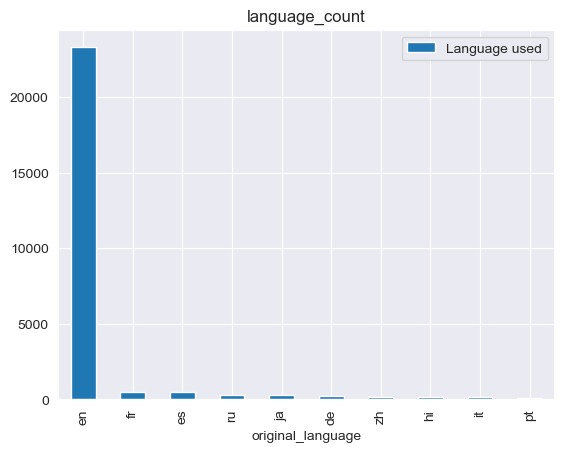

In [51]:
language_counts.plot(kind= 'bar')
plt.title("language_count")
plt.legend(["Language used"])
plt.savefig("zippedData\language_count.png")

From the above we can conclude that most of the acted movies target english audience

In [52]:
#check for duplicates
movies_df.duplicated().value_counts()

False    25497
True      1020
Name: count, dtype: int64

we are gonna extract from the moviesreview.csv make a dataframe from that .. see if we can engineer some nice new features

In [53]:
movies_budget_df =pd.read_csv("zippedData/tn.movie_budgets.csv.gz", delimiter=",")

In [54]:
movies_budget_df.head(10)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"$306,000,000","$936,662,225","$2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"$300,000,000","$678,815,482","$2,048,134,200"
7,8,"May 24, 2007",Pirates of the Caribbean: At Worldâs End,"$300,000,000","$309,420,425","$963,420,425"
8,9,"Nov 17, 2017",Justice League,"$300,000,000","$229,024,295","$655,945,209"
9,10,"Nov 6, 2015",Spectre,"$300,000,000","$200,074,175","$879,620,923"


In [55]:
movies_budget_df.columns


Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [56]:
#checking the shape of the dataframe
movies_budget_df.shape

(5782, 6)

In [81]:
movies_budget_df.drop_duplicates(inplace=True)

In [82]:
movies_budget_df.columns


Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [84]:
movies_budget_df['movie'].duplicated().value_counts()

movie
False    5698
True       84
Name: count, dtype: int64

From the analysis we can see that there are movies that are duplicated... **THATS** bad, we out to use pandas

In [60]:
movies_budget_df['production_budget'].describe()

count            5782
unique            509
top       $20,000,000
freq              231
Name: production_budget, dtype: object

In the budget dataframe, its imparative to see how the variables are related. Using the visualization toolsin our disposal heatmap and scatter plot will suffice.


In [61]:
movies_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In order to use correlation we ought to check the datatype of the dataframe object.
and convert to numeric type

In [62]:
movies_budget_df.dtypes

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [63]:
movies_budget_df['production_budget']= movies_budget_df['production_budget'].str.replace("$","").str.replace(",","")

In [64]:
movies_budget_df['domestic_gross']= movies_budget_df['domestic_gross'].str.replace("$","").str.replace(",","")

In [65]:
movies_budget_df['worldwide_gross']= movies_budget_df['worldwide_gross'].str.replace("$","").str.replace(",","")

In [79]:
movies_budget_df['worldwide_gross']= movies_budget_df['worldwide_gross'].astype('int64')

In [74]:
movies_budget_df['release_date']= movies_budget_df['release_date'].astype('datetime64[ns]')

In [75]:
movies_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,425000000,760507625,2776345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


We are going to calculate the average const of production and do analysis on the movie above the average

In [80]:
world_gross_avg=movies_budget_df['worldwide_gross'].mean()
world_gross_avg

91487460.90643376

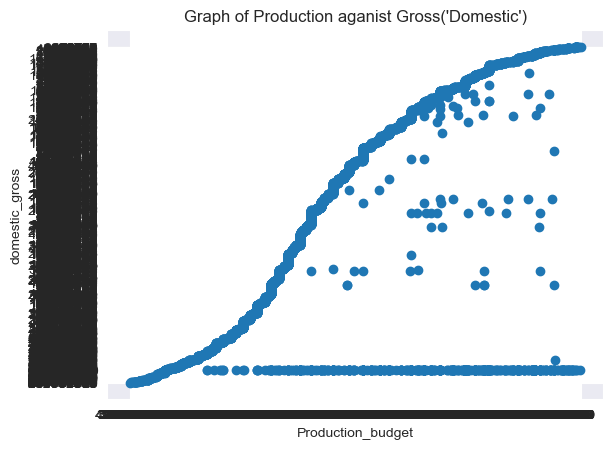

In [95]:
plt.scatter(x=movies_budget_df['production_budget'],y=movies_budget_df['domestic_gross'])
plt.title("Graph of Production aganist Gross('Domestic')")
plt.xlabel("Production_budget")
plt.ylabel("domestic_gross")
plt.savefig("zippedData\Gross(home).png")
plt.show()

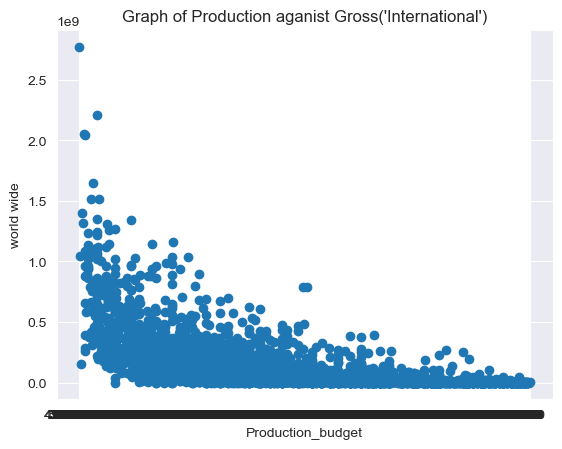

In [96]:
plt.scatter(x=movies_budget_df['production_budget'],y=movies_budget_df['worldwide_gross'])
plt.title("Graph of Production aganist Gross('International')")
plt.xlabel("Production_budget")
plt.ylabel("world wide")
plt.savefig("zippedData\Gross(International).png")
plt.show()

In [ ]:
sn.lineplot(movies_budget_df,x=movies_budget_df['production_budget'], y=movies_budget_df['worldwide_gross'])
plt.show()